A tragédia do Titanic, em 1912, é um dos desastres marítimos mais conhecidos da história. Eternizado no cinema em 1997, o navio construído em Belfast (Irlanda) naufragou quatro dias após sua viagem inaugural, que tinha como destino a cidade de Nova Iorque. Quando construído, o navio prometia ser o mais luxuoso e seguro de sua época. Entretanto, estudos posteriores indicaram falhas no sistema de segurança e evacuação. A estimativa é de 1514 mortes entre os 2224 passageiros, ou seja, aproximadamente 68% da tripulação.

* Survived (Sobreviveu): 0 = Não, 1 = Sim
* Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º
* Sex (Sexo): Sexo do passageiro
* Age (Idade): Idade em anos
* Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
* Parch: Quantidade de pais / crianças a bordo do Titanic
* Ticket (Bilhete): Número do bilhete de embarque
* Fare (Tarifa): Tarifa paga pelo Passageiro
* Cabin (Cabine): Número de cabine
* Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q=Queenstown, S = Southampton)

In [1]:
#Importar bibliotecas
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
#importar csv titanic5 para dataframe
df = pd.read_csv("/content/drive/MyDrive/datasets/titanic5.csv", sep=',', na_values="?")

In [3]:
#head
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
#apagar as colunas: ['name','ticket','sibsp','parch','fare','cabin','embarked','boat','body','home.dest']
df = df.drop(['name','ticket','sibsp','parch','fare','cabin','embarked','boat','body','home.dest'], axis=1)


In [5]:
#head
df.head()

,pclass,survived,sex,age
0,1,1,female,29.00
1,1,1,male,0.92
2,1,0,female,2.00
3,1,0,male,30.00
4,1,0,female,25.00


In [6]:
#describe
df.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881138
std,0.837836,0.486055,14.413493
min,1.000000,0.000000,0.170000
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [7]:
#info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 41.0+ KB


In [8]:
#Converter o atrubuto survived para int
df['survived'] = df['survived'].astype(int)

In [9]:
#valores únicos do atributo "sex"
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
#transformar o atributo 'sex' para 'category'
df['sex'] = df['sex'].astype('category')

In [11]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   int64   
 1   survived  1309 non-null   int64   
 2   sex       1309 non-null   category
 3   age       1046 non-null   float64 
dtypes: category(1), float64(1), int64(2)
memory usage: 32.2 KB


In [12]:
#Verificar número de campos vazios
df.isna().sum()

pclass        0
survived      0
sex           0
age         263
dtype: int64

In [14]:
#Tripulação total
df.shape[0]


1309

In [15]:
#preencher os campos de idade faltantes com a média da idade
df['age'] = df['age'].fillna(df['age'].mean())


In [16]:
#isna
df.isna().sum()

pclass      0
survived    0
sex         0
age         0
dtype: int64

In [17]:
#Número de Homens e Mulheres
df['sex'].value_counts()


male      843
female    466
Name: sex, dtype: int64

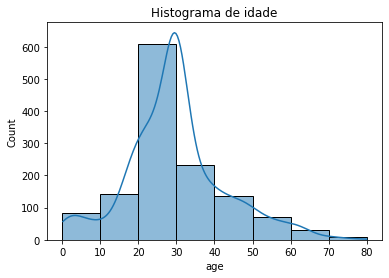

In [21]:
#plotar o histograma de idade (faixa etária)
sns.histplot(data=df['age'], bins=[0,10,20,30,40,50,60,70,80], kde=True)
plt.title("Histograma de idade")
plt.show()


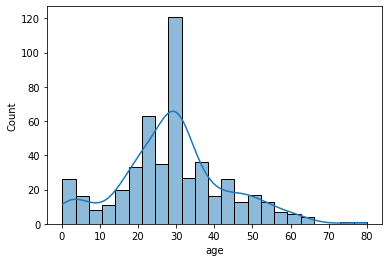

In [23]:
#plotar o histograma de idade dos sobreviventes (faixa etária)
idade_sobreviventes = df.loc[df['survived']==1]
sns.histplot(data=idade_sobreviventes['age'], kde=True)
plt.show()


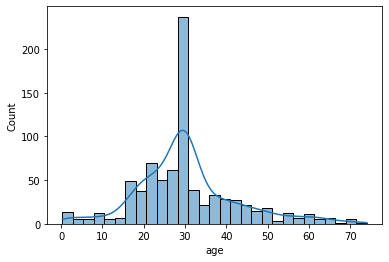

In [24]:
#plotar o histograma de idade dos não sobreviventes (faixa etária)
idade_sobreviventes = df.loc[df['survived']==0]
sns.histplot(data=idade_sobreviventes['age'], kde=True)
plt.show()

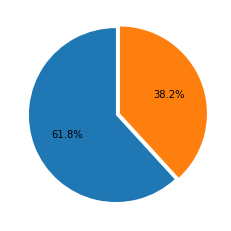

In [31]:
#Grafico de pizza dos sobreviventes
plt.pie(df['survived'].value_counts(), autopct='%1.1f%%', startangle=90, explode=[0,0.05])
plt.show()


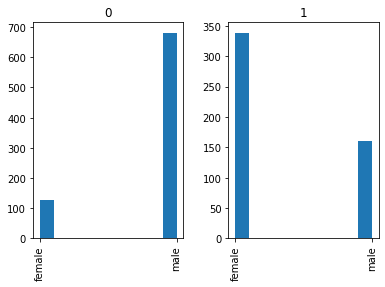

In [34]:
#plotar os sobreviventes e não sobreviventes por sexo
df['sex'].hist(by=df['survived'])
plt.show()


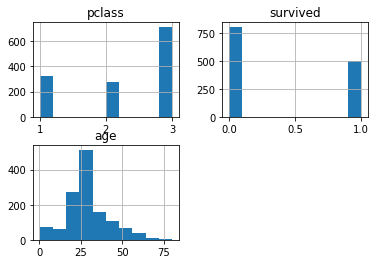

In [36]:
df.hist()
plt.show()

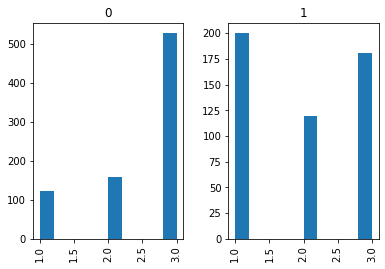

In [37]:
#plotar os sobreviventes e não sobreviventes por classe
df['pclass'].hist(by=df['survived'])
plt.show()

In [39]:
# Cria as variáveis X (atributos de entrada) Y (target)
X = df.loc[:,['pclass','age','sex']] #atributos de entrada
Y = df['survived'] # atributo alvo
X.head()


,pclass,age,sex
0,1,29.00,female
1,1,0.92,male
2,1,2.00,female
3,1,30.00,male
4,1,25.00,female


In [40]:
# one hot encode com pd dummies
X = pd.get_dummies(X, prefix=['sex'])
X.head()


,pclass,age,sex_female,sex_male
0,1,29.00,1,0
1,1,0.92,0,1
2,1,2.00,1,0
3,1,30.00,0,1
4,1,25.00,1,0


In [ ]:
# Head

In [42]:
# transformar X e Y em np array
X = np.array(X)
Y = np.array(Y)
X

array([[ 1.  , 29.  ,  1.  ,  0.  ],
       [ 1.  ,  0.92,  0.  ,  1.  ],
       [ 1.  ,  2.  ,  1.  ,  0.  ],
       ...,
       [ 3.  , 26.5 ,  0.  ,  1.  ],
       [ 3.  , 27.  ,  0.  ,  1.  ],
       [ 3.  , 29.  ,  0.  ,  1.  ]])

In [58]:
# separar os dados em trainamento e test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [59]:
#importar a classe Regressão Logística, instaciar o objeto, ajustar o modelo aos dados de treinamento
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()
modelo.fit(X_train, Y_train)

LogisticRegression()

In [60]:
#predict
Y_pred = modelo.predict(X_test)
Y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [61]:
#calculo do Score
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test,Y_pred)
score

0.7862595419847328

In [56]:
#Matrix de confusão
from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(Y_test,Y_pred)
matriz_confusao


array([[136,  30],
       [ 29,  67]])

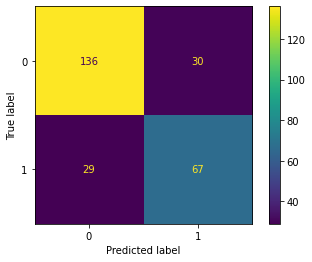

In [57]:
#plotar a confusion matriz
from sklearn.metrics import ConfusionMatrixDisplay
mc = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=modelo.classes_)
mc.plot()
plt.show()


In [ ]:
# a soma de todos os valores é igual ao total de amostras avaliadas 136+27+37+36 = 262
# o modelo acerto 7% pois acerto 138 + 67 / 262  
# o modelo previu 136 mortes e 62 não mortes corretamente
# o modelo previu 27 não mortes e 37 mortes incorretamente

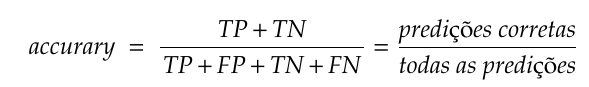

In [79]:
#prevendo se vc sobreviveria
#voce = [pclass, age, sex_female, sex_male]
voce = [[1,20,1,0]]
v_pred = modelo.predict(voce)
v_pred

array([1])

In [80]:
#calculo da probabilidade de morte ou sobrevivencia

prob = modelo.predict_proba(voce)
prob

array([[0.07671428, 0.92328572]])